In [53]:
#nhập các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
from scipy import stats

In [54]:
#đọc data và chuyển file từ đuôi .txt sang đuôi .csv
df = pd.read_csv('C:\\Coding_file\\Lab_5\\babies.txt', delim_whitespace=True)
df.to_csv('data.csv', index=False)

In [55]:
#đọc data
df = pd.read_csv("C:\\Coding_file\\Lab_5\\data.csv")
df.head()

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1


#Mô tả dữ liệu

In [56]:
#viết các hàm tính toán cần thiết
def Q1(g):
  return np.percentile(g, 25)
def Q2(g):
  return np.percentile(g, 50)
def Q3(g):
  return np.percentile(g, 75)
def std(g):
  return np.std(g)
def mean(g):
  return sum(g) / len(g)
def skew(g):
  return scipy.stats.skew(g,bias=False)
def kurtosis(g):
  return scipy.stats.kurtosis(g,bias=False)
def var(g):
  return np.var(g)
def sd(g):
  return np.std(g)
def iqr(g):
  return Q3(g) - Q1(g)
def count(g):
  return len(g)

In [57]:
#lọc dữ liệu thỏa điều kiện 
df_smoke_no_smoke = df[(df['smoke'] == 1) | (df['smoke'] == 0)]

In [58]:
#tạo bảng pivot_table với data đã lọc ở trên vào xét trên chỉ mục cột smoke 
pd.pivot_table(data=df_smoke_no_smoke, index='smoke', aggfunc=['count','min','max','mean',std,var,'median',Q1,Q2,Q3,iqr,skew,kurtosis])

,count,min,max,mean,std,var,median,Q1,Q2,Q3,iqr,skew,kurtosis
,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt
smoke,,,,,,,,,,,,,
0,742,55,176,123.047170,17.386961,302.306400,123.0,113.0,123.0,134.0,21.0,-0.187363,1.052213
1,484,58,163,114.109504,18.080239,326.895034,115.0,102.0,115.0,126.0,24.0,-0.033700,0.000408


In [59]:
df_no_smoke = df[df['smoke'] == 0]
df_table= pd.pivot_table(data=df_no_smoke, index='smoke', aggfunc=['count','min','max','mean',std,var,'median',Q1,Q2,Q3,iqr,skew,kurtosis])
print("var = ", df_table["var"].values[0])
print("sd = ", df_table["std"].values[0])
print("skew = ", df_table["skew"].values[0])
print("kurtosis = ", df_table["kurtosis"].values[0])
print("IQR = ", df_table["iqr"].values[0])
print("min = ",df_table["min"].values[0])
print("max = ",df_table["max"].values[0])
print("range = ", df_table["max"].values[0] - df_table["min"].values[0])
#Nhận xét: dữ liệu phân bố gần nhau. dữ liệu lệch phía phải. Hai bên giảm với tốc độ nhanh.

var =  [302.30640035]
sd =  [17.38696064]
skew =  [-0.18736307]
kurtosis =  [1.0522127]
IQR =  [21.]
min =  [55]
max =  [176]
range =  [121]


#Biểu diễn hình học của dữ liệu

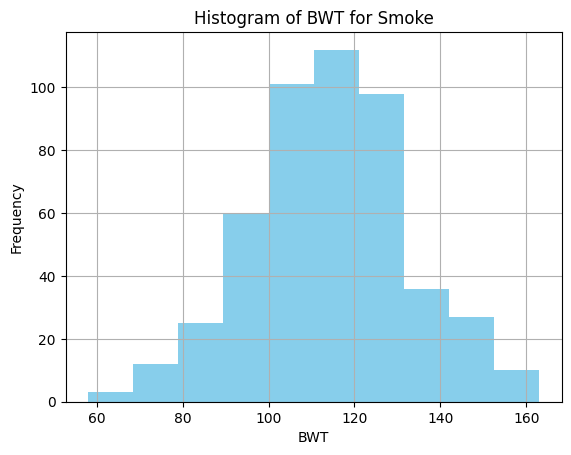

In [60]:
#lọc dữ liệu đối với trường hợp các bà mẹ hút thuốc
#biểu diễn bằng biểu đồ histogram với dữ liệu là số lượng bà mẹ hút thuốc trên cân nặng  
df_smoke = df[df['smoke'] == 1]
plt.hist(df_smoke["bwt"], color='skyblue')
plt.title("Histogram of BWT for Smoke")
plt.xlabel("BWT")
plt.ylabel("Frequency")
plt.grid()
plt.show()

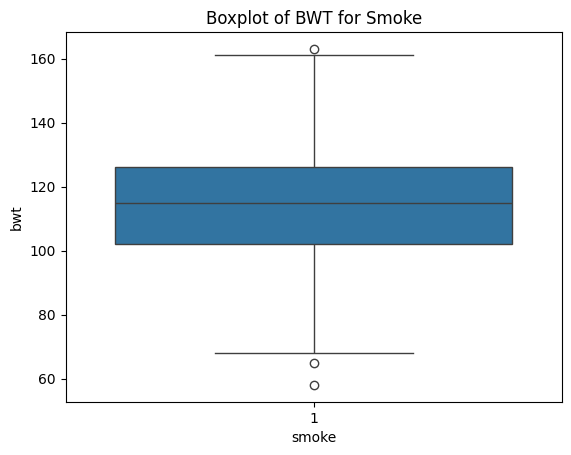

In [61]:
#biểu diễn bằng biểu đồ boxplot với dữ liệu là các bà mẹ hút thuốc 
#dữ liệu phân bố tập trung ở 102 đến 128
#có một số giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 66) 
sns.boxplot(x="smoke", y="bwt", data=df_smoke)
plt.title("Boxplot of BWT for Smoke")
plt.show()

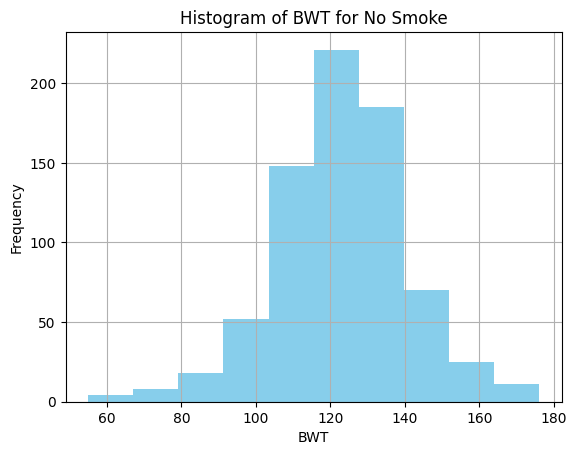

In [62]:
#lọc dữ liệu đối với trường hợp các bà mẹ không hút thuốc
#biểu diễn bằng biểu đồ histogram với dữ liệu là số lượng bà mẹ không hút thuốc trên cân nặng  
df_no_smoke = df[df['smoke'] == 0]
plt.hist(df_no_smoke["bwt"], color='skyblue')
plt.title("Histogram of BWT for No Smoke")
plt.xlabel("BWT")
plt.ylabel("Frequency")
plt.grid()
plt.show()

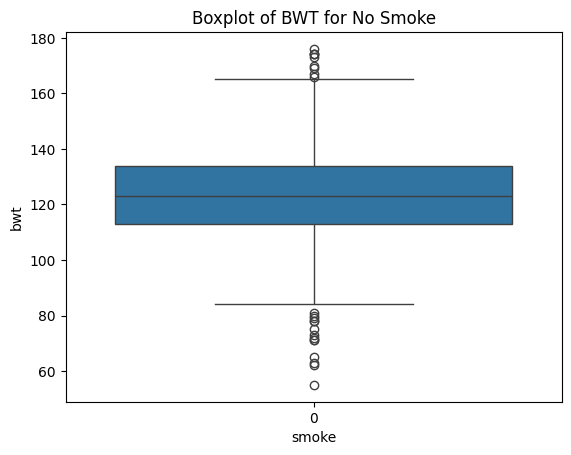

In [63]:
#biểu diễn bằng biểu đồ boxplot với dữ liệu là các bà mẹ không hút thuốc 
#dữ liệu phân bố tập trung ở 118 đến 130
#có nhiều giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 78) 
sns.boxplot(x="smoke", y="bwt", data=df_no_smoke)
plt.title("Boxplot of BWT for No Smoke")
plt.show()

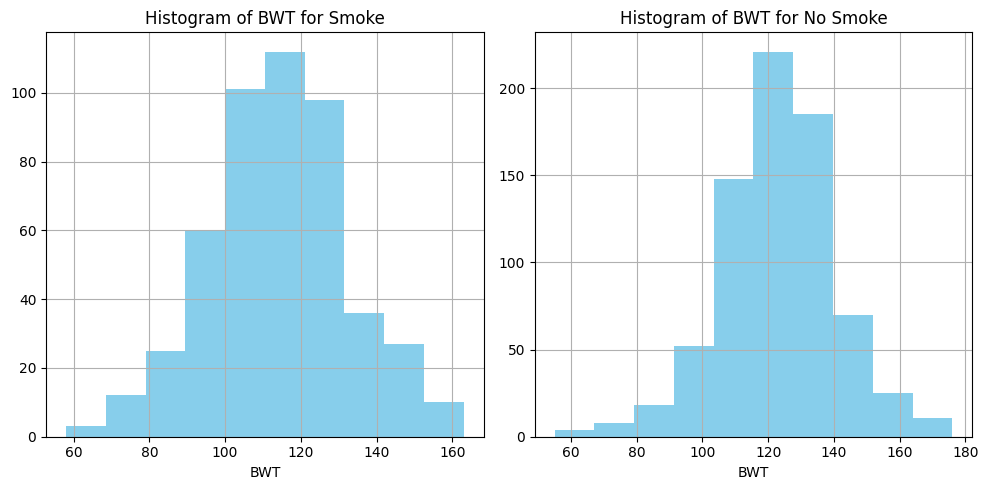

In [64]:
#lọc dữ liệu đối với trường hợp các bà mẹ hút thuốc
#biểu diễn bằng biểu đồ histogram với dữ liệu là số lượng bà mẹ hút thuốc trên cân nặng

#lọc dữ liệu đối với trường hợp các bà mẹ không hút thuốc
#biểu diễn bằng biểu đồ histogram với dữ liệu là số lượng bà mẹ không hút thuốc trên cân nặng
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df_smoke["bwt"], color='skyblue')
plt.title('Histogram of BWT for Smoke')
plt.xlabel("BWT")
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(df_no_smoke["bwt"],color='skyblue')
plt.title('Histogram of BWT for No Smoke')
plt.xlabel("BWT")
plt.tight_layout()
plt.grid()
plt.show()

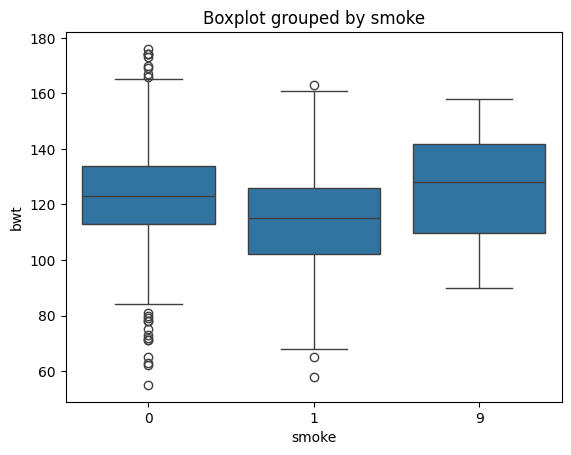

In [65]:
#biểu diễn bằng biểu đồ boxplot với dữ liệu là các bà mẹ hút thuốc 
#dữ liệu phân bố tập trung ở 102 đến 128
#có một số giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 66) 

#biểu diễn bằng biểu đồ boxplot với dữ liệu là các bà mẹ không hút thuốc 
#dữ liệu phân bố tập trung ở 118 đến 130
#có nhiều giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 78) 

#đối với các dữ liệu còn lại thì phân bố tập trung ở 110 đến 141
#không có giá trị ngoại lệ

sns.boxplot(x="smoke", y="bwt", data=df)
plt.title("Boxplot grouped by smoke")
plt.show()

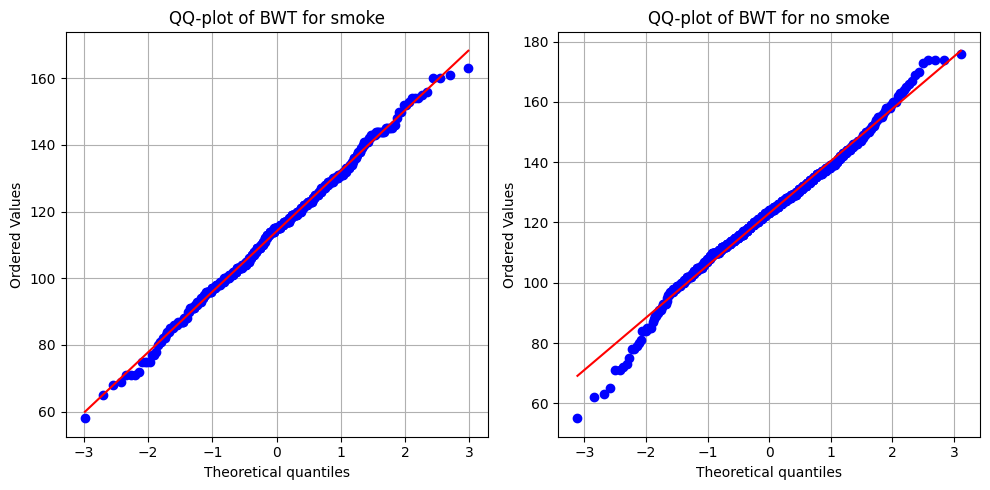

In [66]:
#biểu diễn bằng biểu đồ QQ-plot với dữ liệu là các bà mẹ hút thuốc và bà mẹ không hút thuốc
#dữ liệu của 2 trường hợp có phân bố tương tự nhau.

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_smoke["bwt"], dist="norm", plot=plt)
plt.title('QQ-plot of BWT for smoke')
plt.grid(True)

plt.subplot(1, 2, 2)
stats.probplot(df_no_smoke["bwt"], dist="norm", plot=plt)
plt.title('QQ-plot of BWT for no smoke')

plt.grid(True)
plt.tight_layout()
plt.show()